In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from scripts.plotting import get_learning_curve_data, set_axes_labels, set_axes_ticks,set_axes_scale
%config InlineBackend.figure_format = 'retina'
plt.style.use('plot.mplstyle')

struct_types = ['atomistic','cg','A_cg']

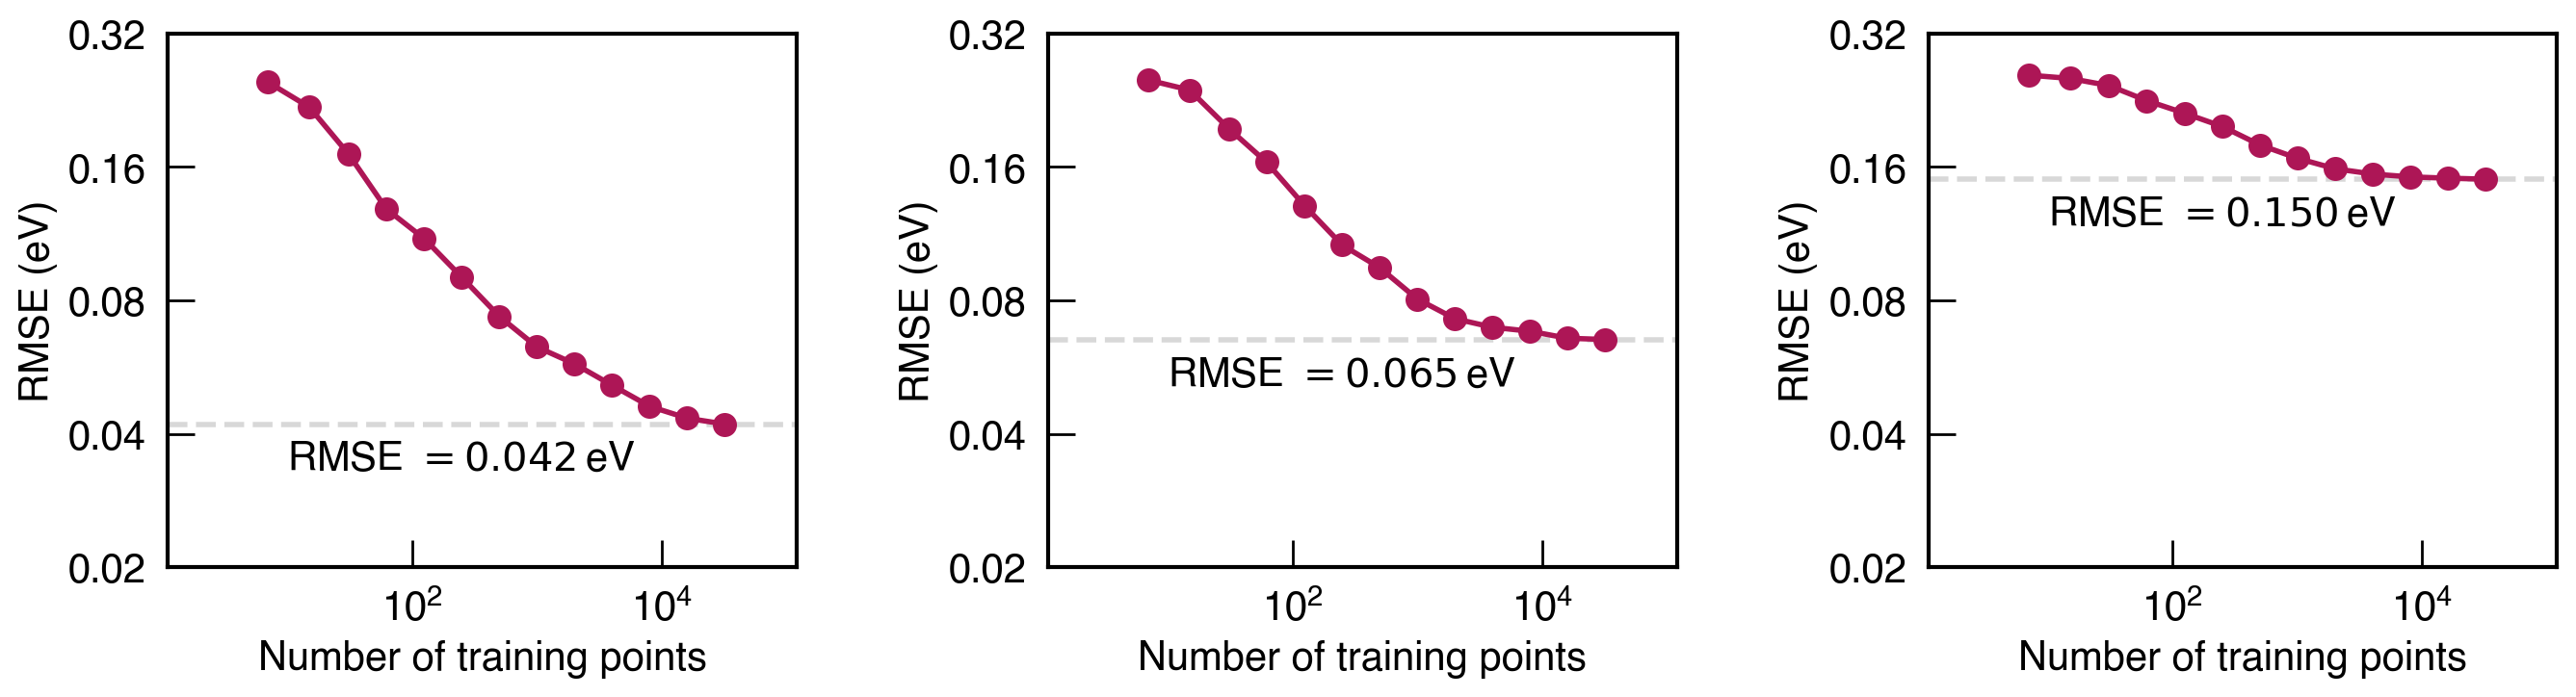

In [4]:
size = 4
fig, axs = plt.subplots(ncols=3,figsize=(4*size,size*0.9))
l_max = 8  
colour = '#AD1656'

for s, ax in zip(struct_types,axs):
    x, y, ticks, labels = get_learning_curve_data(s)
    ax.plot(x,y,marker='o',linewidth=2,markersize=8,color=colour)

    set_axes_labels(ax,'Number of training points','RMSE (eV)')
    set_axes_scale(ax,x_scale='log',y_scale='log')
    set_axes_ticks(ax,y_labels=labels,y_ticks=ticks,minor_ticks=False)
    ax.set_xlim(1.1,120000)
    
    # label the minimum rmse value
    ax.axhline(y=y.min(),linestyle='--',color='grey',linewidth=2,zorder=0,alpha=0.3)
    ax.text(10,y.min(),f'\nRMSE $= {y.min():.3f}\,$eV',fontsize=15,verticalalignment='center',linespacing=2.1,fontdict={'family':'Helvetica','weight':'bold'})
    
plt.subplots_adjust(wspace=0.4)

# plt.savefig(f'../figures/combined_learning_curves_FINAL.png',bbox_inches='tight')